In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy
from rtbm import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

RTBM_precision= 1e-5

# Example 1: Sine-Mixture with gaussian noise

In [ ]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3,phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,3,phase=1j))
M.add(layers.DiagExpectationUnitLayer(3,1,phase=1j))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example: Intrawave modulation

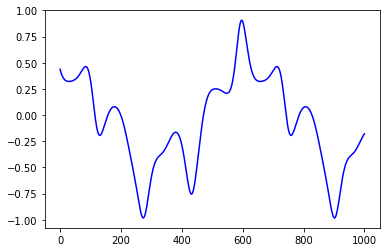

In [125]:
def func(x,n):
    return np.cos(0.01*x+0.5*np.cos(0.05*x))/(2+np.sin(0.04*x))

X = np.linspace(0, 1000, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"b-")

In [129]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,5))
M.add(layers.DiagExpectationUnitLayer(5,5))
M.add(layers.DiagExpectationUnitLayer(5,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [130]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

CMA on 16 cpu(s) enabled
(8_w,16)-aCMA-ES (mu_w=4.8,w_1=32%) in dimension 76 (seed=489552, Mon Oct 30 11:09:12 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     16 1.462765569806071e+04 1.0e+00 9.54e-01  1e+00  1e+00 0:01.3
    2     32 9.858892738744662e+03 1.0e+00 9.22e-01  9e-01  9e-01 0:02.7
    3     48 3.409564816089670e+03 1.0e+00 9.00e-01  9e-01  9e-01 0:04.0
    6     96 1.381536837287946e+03 1.0e+00 8.46e-01  8e-01  8e-01 0:07.9
   10    160 2.081011603838678e+02 1.1e+00 8.21e-01  8e-01  8e-01 0:13.0
   14    224 1.823452937414580e+02 1.1e+00 8.08e-01  8e-01  8e-01 0:18.2
   19    304 1.414265860947189e+01 1.1e+00 8.18e-01  8e-01  8e-01 0:24.8
   25    400 1.826019964716873e+01 1.2e+00 8.35e-01  8e-01  9e-01 0:32.4
   32    512 1.686120858333528e+02 1.2e+00 7.90e-01  8e-01  8e-01 0:41.2
   40    640 3.437421798765953e+00 1.3e+00 7.57e-01  7e-01  8e-01 0:51.0
   48    768 5.080372450802486e-01 1.3e+00 7.54e-01  7e-01  8e-01 1:01.2
   57   

array([-2.70669431,  8.5126318 ,  2.88557462,  6.61532092, -5.50135791,
        1.95992753, -4.76283603,  1.80443257,  0.0555765 , -0.46516775,
        6.07095538,  7.9627004 ,  6.34091903,  9.19338307,  9.57642964,
       -7.53397338,  1.8745416 , -1.83606681,  1.03490927, -7.9667839 ,
        5.50974708, -1.7007822 ,  5.1349622 ,  1.01142859, -1.76326953,
        3.57367223, -3.41551517,  3.24143075, -0.51868828, -2.04454989,
        2.26907352, -2.88983277, -0.22685789, -1.25749519,  0.33592739,
        7.14695498,  5.12833556,  2.61588857, -8.4689674 , -3.43113074,
        5.49860661,  1.56350681, -7.75687448,  0.99446151,  0.35604816,
        5.50570631,  3.10310952,  5.20779726,  9.82202077,  6.54148147,
        4.26834692, -0.42619952, -2.61967411,  0.46511655, -2.15811428,
        2.2255686 , -2.09198156, -0.67754513, -2.56424587,  0.24416972,
        4.81618577,  2.85099517, -2.98078785,  1.00105026, -1.32702403,
        5.43607248,  0.79696237,  3.09316287,  2.34063382,  5.41

Text(0,0.5,u'y')

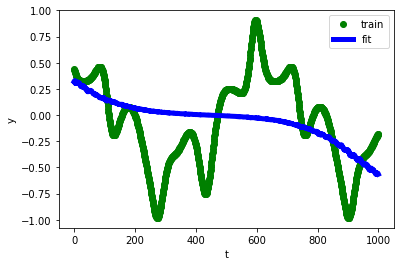

In [131]:
npoints = 1000
test_X = (np.linspace(0, 1000, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,100))
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, maxiter=100)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.xaxis("t")
plt.yaxis("y(t)")
plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [48]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [49]:
M = mdl.Model()
#M.add(layers.Linear(784,1,paramBound=100))
M.add(layers.DiagExpectationUnitLayer(784,1,Qmax=5,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(784,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(25,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(10,1))
#M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#T=enc.transform(Y_train)


In [50]:
minim = minimizer.CMA(True)

sol=minim.train(mse, M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

CMA on 32 cpu(s) enabled
(12_w,24)-aCMA-ES (mu_w=7.0,w_1=24%) in dimension 786 (seed=332977, Sat Oct 28 23:33:48 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     24 3.740086906930568e+01 1.0e+00 4.95e-01  5e-01  5e-01 0:01.0
    2     48 2.539988884050923e+01 1.0e+00 4.91e-01  5e-01  5e-01 0:01.9
    3     72 1.706350302369885e+01 1.0e+00 4.87e-01  5e-01  5e-01 0:02.7
    7    168 9.036257229987459e+00 1.0e+00 4.73e-01  5e-01  5e-01 0:06.4
   12    288 6.933065752440294e+00 1.0e+00 4.59e-01  5e-01  5e-01 0:11.4
   18    432 6.244749497768543e+00 1.0e+00 4.45e-01  4e-01  4e-01 0:17.1
   25    600 5.384451218800711e+00 1.0e+00 4.33e-01  4e-01  4e-01 0:23.5
   33    792 5.143072398586204e+00 1.0e+00 4.22e-01  4e-01  4e-01 0:31.1
   42   1008 5.042708047820132e+00 1.0e+00 4.12e-01  4e-01  4e-01 0:39.3
   52   1248 4.905101428676931e+00 1.0e+00 4.04e-01  4e-01  4e-01 0:48.6
   64   1536 4.763581933132180e+00 1.0e+00 3.97e-01  4e-01  4e-01 0:59.6
   77 

In [51]:
#P=np.argmax(np.real(M.predict(np.transpose(X_train))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

             precision    recall  f1-score   support

        0.0       0.57      0.21      0.31      1001
        1.0       0.37      0.30      0.33      1127
        2.0       0.17      0.21      0.19       991
        3.0       0.20      0.25      0.22      1032
        4.0       0.14      0.20      0.16       980
        5.0       0.14      0.23      0.17       863
        6.0       0.19      0.23      0.21      1014
        7.0       0.23      0.22      0.22      1070
        8.0       0.19      0.13      0.16       944
        9.0       0.38      0.13      0.20       978
       10.0       0.00      0.00      0.00         0
       11.0       0.00      0.00      0.00         0
       12.0       0.00      0.00      0.00         0
       13.0       0.00      0.00      0.00         0

avg / total       0.26      0.21      0.22     10000

[[211 349 236 109  50  28  14   4   0   0   0   0   0   0]
 [ 76 342 391 178  81  37  15   5   1   1   0   0   0   0]
 [ 48 116 211 256 198 100  37  

In [52]:
#P=np.argmax(np.real(M.predict(np.transpose(X_test))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))

             precision    recall  f1-score   support

        0.0       0.58      0.21      0.30       980
        1.0       0.39      0.33      0.36      1135
        2.0       0.16      0.18      0.17      1032
        3.0       0.19      0.23      0.21      1010
        4.0       0.15      0.20      0.17       982
        5.0       0.16      0.26      0.20       892
        6.0       0.15      0.21      0.18       958
        7.0       0.20      0.20      0.20      1028
        8.0       0.22      0.16      0.18       974
        9.0       0.36      0.13      0.19      1009
       10.0       0.00      0.00      0.00         0
       11.0       0.00      0.00      0.00         0
       12.0       0.00      0.00      0.00         0
       13.0       0.00      0.00      0.00         0
       14.0       0.00      0.00      0.00         0

avg / total       0.26      0.21      0.22     10000

[[202 331 234 121  54  20  13   4   1   0   0   0   0   0   0]
 [ 73 372 392 159  79  40  13   5